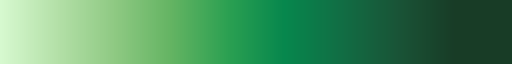

In [1]:

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from matplotlib.ticker import ScalarFormatter, NullFormatter, MultipleLocator, AutoMinorLocator, FuncFormatter
from scipy import integrate
import cmocean

fig_width_pt  = 426.79134                            # \showthe\columnwidth
inches_per_pt = 1.0/72.27                            # pt to in
aspect_ratio  = 0.70                                 # aspect ratio
fig_scale     = 1.0                                  # scale factor
fig_width     = fig_width_pt*inches_per_pt*fig_scale # width in in
fig_height    = fig_width*aspect_ratio               # height in in
fig_size      = [fig_width,fig_height]


def custom_formatter(x, pos):
    if abs(x - round(x)) < 1e-6:
        return rf'${int(round(x))}$'
    else:
        return rf'${x:.1f}$'   

%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'
rc('text', usetex=True)  # switch to True for latex font (might be slow)
rcParams.update({'figure.figsize': fig_size, "xtick.major.size": 6, "xtick.minor.size": 3, "ytick.major.size": 6, "ytick.minor.size": 3, 
                 'xtick.direction': 'in', 'ytick.direction': 'in', 'xtick.top': True, 'ytick.right': True, 
                 'font.size': 18, 'figure.constrained_layout.use':True})
rcParams['ytick.minor.visible'] = True
rcParams['xtick.minor.visible'] = True

greys   = [plt.get_cmap("Greys"  , 16)(i) for i in range(1, 15)]
blues   = cmocean.tools.crop_by_percent(cmocean.cm.balance_r, 50, which='min', N=10)
reds    = cmocean.tools.crop_by_percent(cmocean.cm.balance, 50, which='min', N=10)
greens  = cmocean.tools.crop_by_percent(cmocean.cm.algae, 10, which='max', N=10)
purples = cmocean.tools.crop_by_percent(cmocean.cm.amp, 10, which='min', N=10)
greens

# <center>Mean velocity profile in stably stratified channel turbulence</center>

             Created on: July 26, 2025
           Developed by: Rene Pecnik (r.pecnik@tudelft.nl)
                         Pedro Costa (psimoescosta1@tudelft.nl)
                         Sanath Kotturshettar (s.b.kotturshettar@tudelft.nl)
                         Process & Energy Department, Faculty of 3mE
                         Delft University of Technology, the Netherlands.

# <center> Monin-Obukhov Similarity Theory (MOST)  </center>

$$\frac{\kappa z}{u_{\tau}} \frac{\mathrm{d}\overline{u}}{\mathrm{d}z} = \phi\left(\frac{z}{L}\right);$$

### Obukhov length scale ($L$)

$$ L = -\frac{u_{\tau}^{3/2}}{\kappa\ ({g}/{\theta_0})\ q_{\mathrm{w}}} $$

### Local Obukhov length scale ($\Lambda$)

$$ \Lambda(z) = L \left(1 - \frac{z}{h}\right)^{3/2} $$

# <center> Estimating the mean velocity profile </center>


The mean velocity profile in stably stratified turbulent channel flows is estimated as a function of the friction Reynolds ($Re_{\tau}$) and the friction Richardson number ($Ri_{\tau}$). The composite profile is comprised of 5 distinct regions:

### <u>I.  Viscous sublayer: </u>

$$u^+ = z^+.$$

$$ \ $$
### <u> II. Inertial sublayer: </u>

 $$u^+ = \frac{1}{\kappa} \ln(z^+) + \frac{4.7}{\kappa} \frac{2h}{L} \left(1 - \frac{z}{h}\right)^{-1/2} + C_1,$$

where,

$$C1 = {z_\mathrm{M}^+} - \frac{1}{\kappa}\ln({z_\mathrm{M}^+}) - \frac{4.7}{\kappa} \frac{2h}{L} - \frac{4.7}{\kappa} \frac{h}{L}\frac{{z_\mathrm{M}^+}}{Re_{\tau}},\ $$
where $z_{\mathrm{M}}^+$ is the point of intersection of turbulent and viscous stresses close to the wall, which is estimated as;
$${z_\mathrm{M}^+} = 11.1 + C_z \ \mathrm{max}\left(0, \frac{Ri_{\tau}}{Re_{\tau}} - 0.5\right).\ $$


The inertial sublayer extends from $z^+ \approx 30 $ to the the transition point, $z_t$. The transition point can be analytically estimated as the location where $z \approx \Lambda$. Therefore, 

$$z_t = \left.z\right|_{z/\Lambda = 1}. $$

The stratified outer layer starts from this point.
$$ \ $$
 
### <u> III. Stratified outer layer: </u>


$$u^+ = \frac{1}{\kappa}\ln{\frac{z}{h}}-\frac{4.7}{\kappa} \frac{h}{L} \ln{\left(1 - \frac{z}{h}\right)} + \frac{2}{\kappa} \sqrt{1 - \frac{z}{h}} - \frac{2}{\kappa} \ln{\left(1 + \sqrt{1 - \frac{z}{h}}\right)} + C_2$$

where,

$$ C2 \approx \frac{1}{\kappa} \ln{Re_{\tau}} + 5.2 $$

The stratified outer layer extends upto the point where viscous stresses become comparable to turbulent stresses. This is observed to occur at $z \approx 8\Lambda$. Therefore we have,

$$ z_{III}^u = \left.z\right|_{z/\Lambda = 8} $$

$$ \ $$
### <u> IV. Turbulent-viscous transition layer: </u>

Blending the profile III and V

$$ \ $$
### <u> V. Viscous core: </u>

$$u_{\mathrm{cl}}^+ - u^+ = \frac{Re_{\tau}}{2}\left(1 - \frac{z}{h}\right)^2,$$

where the centerline velocity is estimated through parametrizing the deviation from the neutral case. If the centerline velocity at given $Re_{\tau}$, is $u_{\mathrm{cl,N}}^+ \approx {1}/{\kappa} \ln Re_{\tau} + 5.2$, then stratification suppresses turbulence near the centerline that leads to an increased $u_{\mathrm{cl}}^+$ that is captured by:

$$\Delta u_{\mathrm{cl}}^+ = u_{\mathrm{cl}}^+ - u_{\mathrm{cl,N}}^+ = Ri_{\tau}^{0.63} Re_{\tau}^{-0.12}.$$

The mean velocity follows parabolic profile until wherever the turbulent stresses pick up from being zero at the centerline and become comparable to viscous stresses. This point is estimated to scale as,

$$ \frac{z^l_{\mathrm{V}}}{h} =  1 - \frac{1}{\sqrt{Re_L}}\ \sqrt{\frac{4.7}{2\kappa}}. $$


$$ \ $$

### Estimating $h/L$

For estimating the Obukhov length scale, $L$, we use the relation,

$$\frac{h}{L} = 0.115 \left(\frac{Ri_{\tau}}{\sqrt{Re_{\tau}}}\right)^{2/3}.$$



#
#
#
#
The following code snippet defines the ```MOST_Ch``` class, which contains methods for reconstructing velocity profiles in different flow regions based on the equations outlined above.
#
#
#
#

In [2]:
class MOST_Ch:

    def __init__(self, ReTau, RiTau):
        
        self.ReTau = ReTau
        self.RiTau = RiTau

        self.L     = (.115*(self.RiTau/self.ReTau**(1./2.))**(2./3.))**(-1)
        self.u_cl  = 1/.41*np.log(self.ReTau) + 5.2 + 1.*(self.RiTau)**(0.63)*self.ReTau**(-0.12)

        coeff  = [1, (1./self.L)**2 - 3, 3, -1]
        coeff2 = [1, (1./(8*self.L))**2 - 3, 3, -1]
        roots  = np.roots(coeff)
        roots2 = np.roots(coeff2)

        self.int_c0 = 11.1 + 2.*max(0., self.RiTau/self.ReTau - 0.5)

        for jj in range(len(roots)):

            if np.isreal(roots[jj]):
                self.zt  = np.real(roots[jj])
            if np.isreal(roots2[jj]):
                self.z3u = np.real(roots2[jj])
    
        self.z5l  = 1-np.sqrt(4.7*0.5/.41*1./self.ReTau/self.L)

    def uI(self, z):

        zp = z*self.ReTau

        return zp

    def uII(self, z):

        zp = z*self.ReTau

        c0_c0  = self.int_c0 - 1/.41*np.log(self.int_c0) - 9.4*1./0.41*1/self.L - 4.7*1./0.41*1/self.L*self.int_c0/self.ReTau

        return 1/0.41*(np.log(zp) + 9.4/self.L*(1- zp/self.ReTau)**(-1./2.)) + c0_c0
    
    def uIII(self, z):

        return 1/0.41*np.log(z) \
                - 4.7/0.41*1./self.L*(np.log(1-z)) \
                + 2./0.41*(1 -z)**(.5) \
                - 2./0.41*np.log(1 + (1 -z)**(.5)) \
                + 1/0.41*np.log(self.ReTau) \
                + 5.2
    
    def uV(self, z):

        return -1./2.*self.ReTau*(1 - z)**2 + self.u_cl
    
    def uIV(self, z):

        u3u = self.uIII(self.z3u)
        u5l = self.uV  (self.z5l)

        return u3u + (u5l - u3u) * (z - self.z3u) / (self.z5l - self.z3u)
    
    def composite_u(self, z = None, N = 500):

        if z is None:
            z  = np.linspace(0, 1., N)
                    
        u = np.zeros_like(z)

        mask1 = z <= self.int_c0/self.ReTau
        mask2 = (z > self.int_c0/self.ReTau) & (z <= self.zt)
        mask3 = (z > self.zt) & (z <= self.z3u)
        mask4 = (z > self.z3u) & (z <= self.z5l)
        mask5 = z > self.z5l

        u[mask1] = self.uI(z[mask1])
        u[mask2] = self.uII(z[mask2])
        u[mask3] = self.uIII(z[mask3])
        u[mask4] = self.uIV(z[mask4])
        u[mask5] = self.uV(z[mask5])

        return z, u

In [3]:
from ipywidgets import interact, FloatSlider

def plot_profile(reTau, riTau):

    profile = MOST_Ch(reTau, riTau)
    
    z, u = profile.composite_u()


    plt.plot(z,u)
    plt.plot(profile.zt, profile.uII(profile.zt), ls ='', marker = '^', ms = 19, markeredgecolor = 'crimson', color = 'crimson', alpha= 0.3)
    plt.plot(profile.z3u, profile.uIII(profile.z3u), ls ='', marker = 'v', ms = 19, markeredgecolor = 'orangered', color = 'orangered', alpha= 0.3)
    plt.plot(profile.z5l, profile.uV(profile.z5l), ls ='', marker = 'P', ms = 19, markeredgecolor = 'palevioletred', color = 'palevioletred', alpha= 0.3)

    plt.xlim([0, 1])
    plt.xlabel(r'$z/h$')
    plt.ylabel(r'$u^+$')

    print("Estimated skin friction coefficient = ", 2./(integrate.trapezoid(u, z))**2 )

interact(
    plot_profile,
    reTau=FloatSlider(min=0, max=2000, step=10, value=550, description='Re\u03C4'),
    riTau=FloatSlider(min=1e-3, max=2000, step=10, value=720, description='Ri\u03C4')
)


interactive(children=(FloatSlider(value=550.0, description='Reτ', max=2000.0, step=10.0), FloatSlider(value=72…

<function __main__.plot_profile(reTau, riTau)>